## Wrapping It Up

As we conclude this journey through the evolution of ESUPS and the STOCKHOLM platform, it's inspiring to reflect on how a collaborative spirit and a shared vision can drive meaningful change. ESUPS began as a modest initiative, a simple spreadsheet aimed at cataloging disaster relief supplies to prevent the inefficiencies witnessed during the Nepal earthquake response. However, it was through strategic partnerships with academia, non-profit organizations, and industry leaders that ESUPS transformed into a global force reshaping disaster preparedness and response.

The collaboration with universities like Penn State and MIT infused ESUPS with cutting-edge research and fresh perspectives. Students and academics brought innovative optimization models and data analytics techniques to the table, enhancing the platform's ability to make data-driven decisions. These partnerships not only advanced ESUPS's mission but also provided invaluable real-world experience for students eager to apply their skills to pressing global challenges.

Non-profit organizations and NGOs contributed on-the-ground insights and a deep understanding of humanitarian needs. Their involvement ensured that the solutions developed were practical, culturally sensitive, and aligned with the realities of disaster-stricken areas. This synergy between theoretical models and practical application exemplifies how diverse stakeholders can come together to tackle complex problems effectively.

For students and aspiring professionals, the story of ESUPS serves as a powerful reminder that impactful ideas often start small but can grow exponentially through collaboration and determination. It highlights the potential each individual has to contribute to a better world, especially when leveraging skills in data science, optimization, and technology.

You, too, can implement your own ideas for a better world. Whether it's developing innovative algorithms to optimize resource allocation, creating platforms that enhance communication among aid organizations, or initiating community projects that address local issues, your contributions matter. The tools and techniques explored in this notebook are not just academic exercises—they are gateways to real-world applications that can save lives and improve outcomes in critical situations.

We encourage you to take the lessons learned from ESUPS and apply them in your own pursuits:

-   Embrace Collaboration: Seek partnerships with universities, non-profits, and industry experts. Collaboration amplifies impact.
-   Leverage Technology for Good: Use your technical skills to develop solutions that address societal challenges.
-   Think Globally, Act Locally: Start with problems you are passionate about in your community; small changes can lead to significant impact.
-   Stay Curious and Innovative: Continuously explore new ideas and approaches. Innovation thrives on curiosity and the willingness to challenge the status quo.
By following in the footsteps of ESUPS and other pioneering initiatives, you can be part of a generation that not only understands the complexities of global challenges but actively contributes to solving them. The future of disaster response, humanitarian aid, and many other fields depends on innovative thinkers and dedicated doers like you.

Remember, significant change often begins with a single idea and grows through collaboration, perseverance, and a shared commitment to making the world a better place. We look forward to seeing how you will apply these insights to create your own impactful narratives.

## Math Addendum

### Introduction to Optimization 

#### What Happened to the Second Derivative?

In the realm of optimization, the second derivative of a function, often referred to as the Hessian matrix in multi-dimensional spaces, provides valuable insights into the curvature of the objective function. Specifically, it helps us understand how the slope of the function changes, enabling us to distinguish between local maxima, minima, and saddle points. This information is crucial for methods like Newton's method, which uses the second derivative to make precise adjustments toward the optimal solution.

However, in complex, real-world problems such as disaster relief logistics, relying on the second derivative presents significant challenges:

1. **Non-Linear and Non-Smooth Functions**: The objective functions in disaster relief are often non-linear and may have discontinuities due to the various constraints and sudden changes in variables (e.g., supply chain disruptions, varying demand). Calculating the second derivative for such functions can be impractical or impossible, as these irregularities disrupt the smooth curvature that the second derivative relies on.

2. **High Dimensionality**: The optimization problems in disaster relief involve numerous variables, such as quantities of different supplies, multiple transportation routes, and varying time constraints. The Hessian matrix, representing the second derivatives with respect to all pairs of variables, becomes exceedingly large and computationally expensive to compute and store. In high-dimensional spaces, the complexity and cost of computing the Hessian can outweigh its benefits.

3. **Dynamic and Stochastic Environments**: The environment in which disaster relief operations take place is dynamic and often stochastic, with elements of uncertainty and unpredictability. These factors introduce variability that is difficult to capture with static second-order information. As the situation evolves, the second derivative may no longer accurately represent the current state of the system.

4. **Local Optima**: In complex optimization landscapes, there are often multiple local optima. The second derivative provides local information and might lead optimization algorithms to converge to these local optima rather than the global optimum. This is particularly problematic in disaster relief, where finding the best possible solution can make a critical difference.

5. **Lack of Closed-Form Solutions**: When dealing with high-power polynomials and other complex functions, closed-form solutions for finding the roots do not always exist. The second derivative may help approximate solutions in simpler cases, but as the degree of the polynomial increases, finding exact solutions becomes intractable. This is particularly relevant in disaster logistics, where the relationships between variables can be modeled by high-degree polynomials without straightforward solutions.

Given these challenges, alternative optimization methods are preferred. Gradient-based approaches like gradient descent rely solely on the first derivative (gradient) and can handle larger, non-linear, and non-smooth problems more effectively. Additionally, heuristic and metaheuristic methods, such as genetic algorithms, simulated annealing, and particle swarm optimization, do not rely on derivative information at all. These methods explore the solution space more broadly and can escape local optima.

#### The Largrangian

The Lagrangian is a fundamental concept in optimization, especially when dealing with constraints. In simple terms, the Lagrangian function incorporates both the original objective function and the constraints of the problem, allowing us to solve constrained optimization problems more effectively. For disaster relief optimization, the Lagrangian helps in balancing the trade-off between minimizing costs and meeting the demand for supplies under various constraints, such as limited resources or maximum allowable transit times. By introducing Lagrange multipliers, we transform the problem into an unconstrained one, making it easier to find optimal solutions that respect all necessary conditions.

The Lagrangian approach is particularly powerful when second-order methods are impractical due to the reasons mentioned above. By converting a constrained problem into an unconstrained one, it simplifies the complexity and allows for the use of gradient-based methods or other optimization techniques that do not rely on second-order derivatives. This flexibility makes the Lagrangian method a crucial tool in the optimization toolbox, especially for complex, real-world problems like disaster relief logistics.

##### Branch and Bound

The **Branch and Bound** method is a powerful optimization technique used for solving **integer programming** problems where some or all decision variables must take on integer values. The fundamental idea is to systematically explore branches of possible solutions while “bounding” areas that cannot contain the optimal solution, thereby narrowing down the search efficiently.


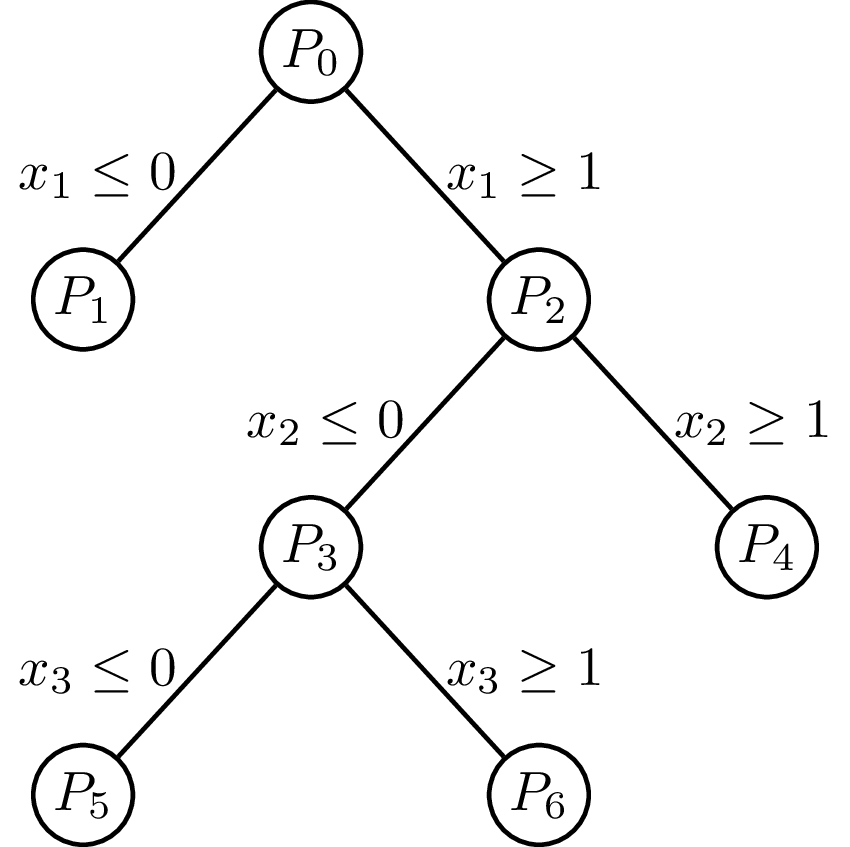

In [185]:
Image(filename='images/branch-and-bound.png',width=400, height=200)

**Step-by-Step Process:**
1.	**Relaxation of Constraints:**
To start, we relax the integer constraints, treating all variables as continuous. This relaxation converts the integer programming problem into a standard linear programming problem, which we can solve efficiently using the **Simplex Method**. The result of this relaxed problem provides a baseline solution that may not necessarily satisfy the integer requirements. For example, if the optimal solution of the relaxed problem gives us a variable  x = 2.6 , we know this is not a valid solution if  x  must be an integer.

2.	**Creating Subproblems by Branching:**
When a solution contains a variable that is not an integer (like  x = 2.6 ), we create two subproblems by “branching” on this variable:
    -	**Branch 1:** Add a constraint that rounds  x  **down** to the nearest integer,  $x \leq 2$.
    -	**Branch 2:** Add a constraint that rounds  x  **up** to the next integer,  $x \geq 3$.
These constraints split the solution space into two smaller, more manageable subproblems. By dividing the problem this way, we explore different regions of the solution space that could lead to an optimal integer solution.

3.	**Solving and Bounding:**
We then solve each of these subproblems, again using the Simplex Method, to find the best possible solutions within the new constraints. For each subproblem:
    -	If a subproblem yields a solution that is **feasible** (i.e., all variables are integers) and **better** than the current best-known solution, it becomes the new candidate for the optimal solution.
    -	If a subproblem’s solution is not feasible (i.e., it still has non-integer variables) or if it cannot improve upon the current best solution, we bound it off. This means we stop exploring that branch further, as it cannot possibly lead to a better solution.

4.	**Recursive Exploration:**
The process continues recursively: for each subproblem that still contains non-integer solutions, we branch again, creating further subproblems with tighter constraints. This systematic exploration and bounding help eliminate large swaths of the solution space that cannot contain the optimal solution, making the search much more efficient.

5.	**Convergence to the Optimal Solution:**
The Branch and Bound algorithm terminates when all subproblems have been explored or bounded off. At this point, the best feasible solution found is guaranteed to be the **optimal solution** for the original integer programming problem. Unlike heuristic methods, this approach provides a definitive, mathematically-proven optimal solution.

By combining the efficiency of the Simplex Method for solving linear problems with a systematic search for feasible integer solutions, Branch and Bound is a robust method for tackling complex optimization problems where some or all decision variables must be integers.

#### Stochastic Systems


In the context of disaster relief logistics, the environment is not just dynamic but also inherently stochastic. This means that many of the variables involved—such as demand for supplies, transportation times, or the availability of resources—are not deterministic. Instead, they are influenced by a range of unpredictable factors, from weather conditions to sudden changes in infrastructure availability or the emergence of new areas needing assistance. Stochastic systems introduce randomness and uncertainty into optimization problems, requiring specialized approaches that can handle variability effectively.

1.	Stochastic Optimization: Unlike deterministic optimization methods that assume a fixed environment, stochastic optimization incorporates randomness directly into the problem formulation. Techniques such as Stochastic Gradient Descent (SGD) adapt the optimization process to the presence of noise by using randomly selected subsets of data to update solutions iteratively. This allows the method to converge more quickly on large datasets or complex environments typical of disaster relief operations, where real-time data is continuously being updated.
2.	Modeling Uncertainty with Probabilistic Constraints: Disaster relief problems often require the modeling of uncertainty in the constraints themselves. For instance, a probabilistic constraint might state that the likelihood of delivering sufficient supplies to a location must be at least 95%. Methods like Chance-Constrained Programming and Robust Optimization are designed to handle such constraints, ensuring that solutions are viable even under uncertain conditions.
3.	Monte Carlo Methods and Simulation-Based Approaches: For highly uncertain systems where analytical solutions are challenging to derive, Monte Carlo simulations provide a practical alternative. These simulations model different possible scenarios by generating random samples from probability distributions associated with uncertain parameters. By running a large number of such simulations, decision-makers can estimate the expected outcomes and identify strategies that are robust across a range of possible futures. This is particularly valuable in disaster relief logistics, where preparing for the worst-case scenarios can save lives.
4.	Reinforcement Learning (RL) for Adaptive Decision Making: RL techniques are increasingly applied to stochastic optimization problems in logistics and supply chain management. In the RL framework, an agent learns to make decisions by interacting with an environment, receiving feedback in the form of rewards or penalties. This approach allows the agent to develop strategies that perform well under uncertainty and adapt to evolving conditions, making it highly suitable for disaster relief scenarios where rapid and flexible response is essential.
5.	Markov Decision Processes (MDPs) and Partially Observable MDPs (POMDPs): When dealing with sequential decision-making under uncertainty, MDPs provide a powerful framework to model the problem. In MDPs, decisions are made in stages, and each decision affects both immediate rewards and future states of the system. POMDPs extend this framework to situations where the system’s state is not fully observable, which is often the case in disaster response. For example, the exact condition of a road or the need level in a community may only be partially known due to limited communication. These models help optimize policies that account for both known and unknown elements, providing a balanced approach to decision-making under uncertainty.
6.	Dynamic Programming and Approximate Dynamic Programming: In problems characterized by stochasticity and high dimensionality, exact solutions are often impractical. Dynamic Programming (DP) breaks down the problem into smaller, more manageable subproblems, solving them recursively. However, when the state space is too large (a common issue in real-world logistics), Approximate Dynamic Programming (ADP) or reinforcement learning-based approaches like Q-learning or policy gradients are used to find near-optimal solutions without exhaustive computation.

In conclusion, handling stochastic systems requires a blend of probabilistic modeling, simulation, and adaptive learning techniques. For disaster relief logistics, where uncertainty is a given and stakes are high, these methods provide the necessary tools to devise strategies that are not only optimal in theory but also robust and flexible in practice. The ability to incorporate randomness, adapt to evolving scenarios, and provide solutions under uncertainty makes stochastic systems analysis a cornerstone of modern optimization approaches in complex, real-world environments.